# Reading the dataset

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn theme
sns.set_theme()

In [51]:
total_data = pd.read_csv('../data/raw/diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explore the Dataset

In [52]:
total_data.shape

(768, 9)

In [53]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Comprobamos duplicados

In [54]:
total_data[total_data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No hay duplicados.

## Comprobamos valores nulos

In [55]:
100 * total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No hay valores nulos.

In [56]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Analisis de Variables Numericas

In [57]:
list_data = list(total_data.columns)
target = list_data[-1]
print(target)

Outcome


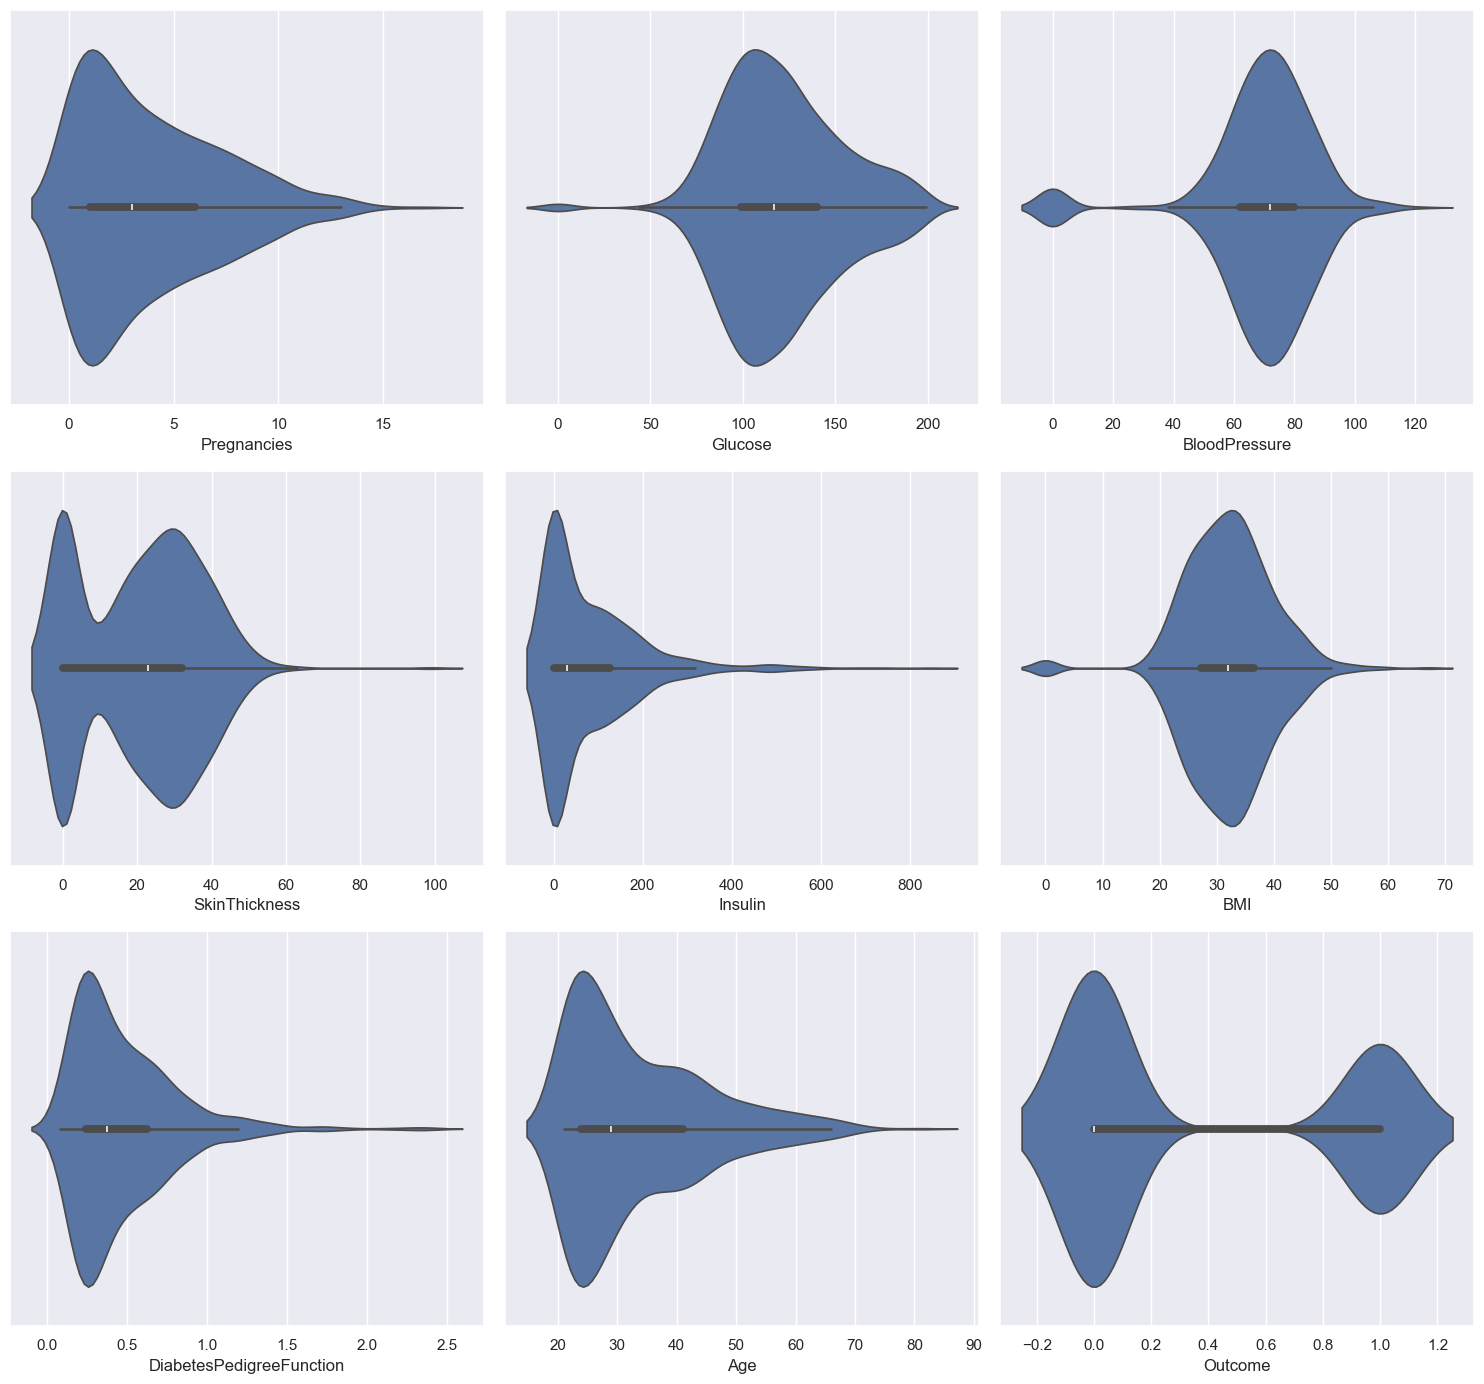

In [58]:
fig, axes = plt.subplots(3, 3, figsize = (15, 14))

sns.violinplot(data = total_data, ax = axes[0, 0], x = list_data[0])
sns.violinplot(data = total_data, ax = axes[0, 1], x = list_data[1])
sns.violinplot(data = total_data, ax = axes[0, 2], x = list_data[2])
sns.violinplot(data = total_data, ax = axes[1, 0], x = list_data[3])
sns.violinplot(data = total_data, ax = axes[1, 1], x = list_data[4])
sns.violinplot(data = total_data, ax = axes[1, 2], x = list_data[5])
sns.violinplot(data = total_data, ax = axes[2, 0], x = list_data[6])
sns.violinplot(data = total_data, ax = axes[2, 1], x = list_data[7])
sns.violinplot(data = total_data, ax = axes[2, 2], x = list_data[8])

plt.tight_layout()
plt.show()

## Relacion de variables con la variable objetivo

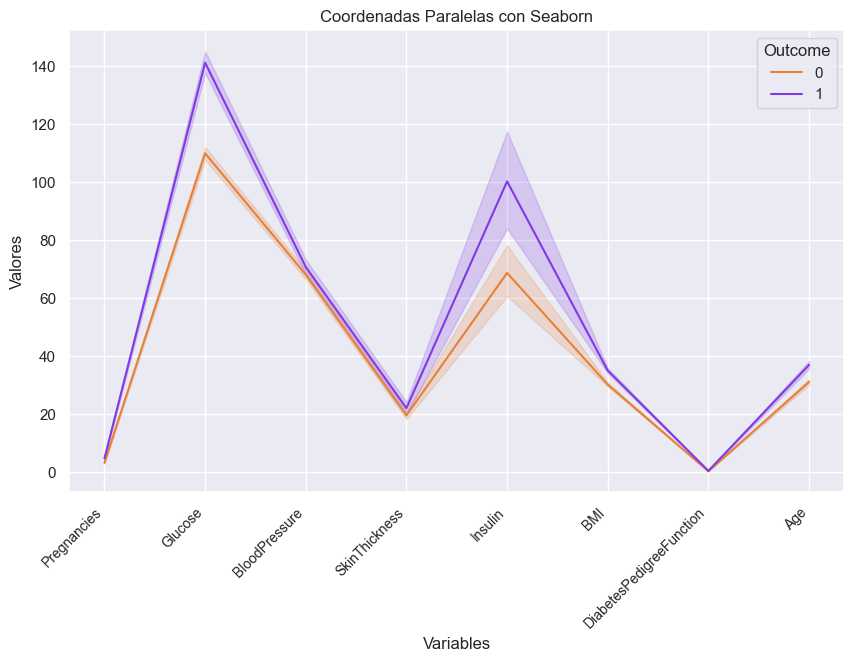

In [59]:
# Convertimos los datos a formato largo
df_melted = pd.melt(total_data, id_vars=[target], var_name="Variables", value_name="Valores")

# Creamos el gráfico de coordenadas paralelas
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_melted, x="Variables", y="Valores", hue=target, palette=["#E58139", "#8139E5"])

# Ajustamos las etiquetas del eje x
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.title("Coordenadas Paralelas con Seaborn")
plt.show()

## Feature Selection

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Dividir los datos en caracteristicas (X) y la variable objetivo
X = total_data.drop(['Outcome'], axis = 1)
y = total_data['Outcome']

# Dividir los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# Crear un modelo de seleccion de caracteristicas con SelectKBest
# Seleccionamos las 7 mejores caracteristicas
selection_model = SelectKBest(k = 7)

# Ajustar el modelo de seleccion a los datos de entrenamiento
selection_model.fit(X_train, y_train)

SelectKBest(k=7)

In [62]:
# Obtener los nombres de las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

selected_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [63]:
# Trasformar los conjuntos de entrenamiento y prueba para incluir solos las caracteristicas seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [64]:
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [65]:
# Asignamos los valores de y_train a una nueva columna 'Outcome' en el DataFrame X_train_sel
X_train_sel['Outcome'] = y_train.values

# Asignamos los valores de y_test a una nueva columna 'Outcome' en el DataFrame X_test_sel
X_test_sel['Outcome'] = y_test.values

In [66]:
# Guardamos
X_train_sel.to_csv('../data/processed/clean_train_data.csv')
X_test_sel.to_csv('../data/processed/clean_test_data.csv')

# Decision Tree Model

In [67]:
train_data = pd.read_csv('../data/processed/clean_train_data.csv')
test_data = pd.read_csv('../data/processed/clean_test_data.csv')

In [68]:
# Dividimos el conjunto de datos
X_train = train_data.drop(['Outcome'], axis = 1)
y_train = train_data['Outcome']

X_test = test_data.drop(['Outcome'], axis = 1)
y_test = test_data['Outcome']

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Creamos una instancia del modelo DecisionTreeClassifier con un random_state aleatorio fijo
model = DecisionTreeClassifier(random_state = 42)

# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

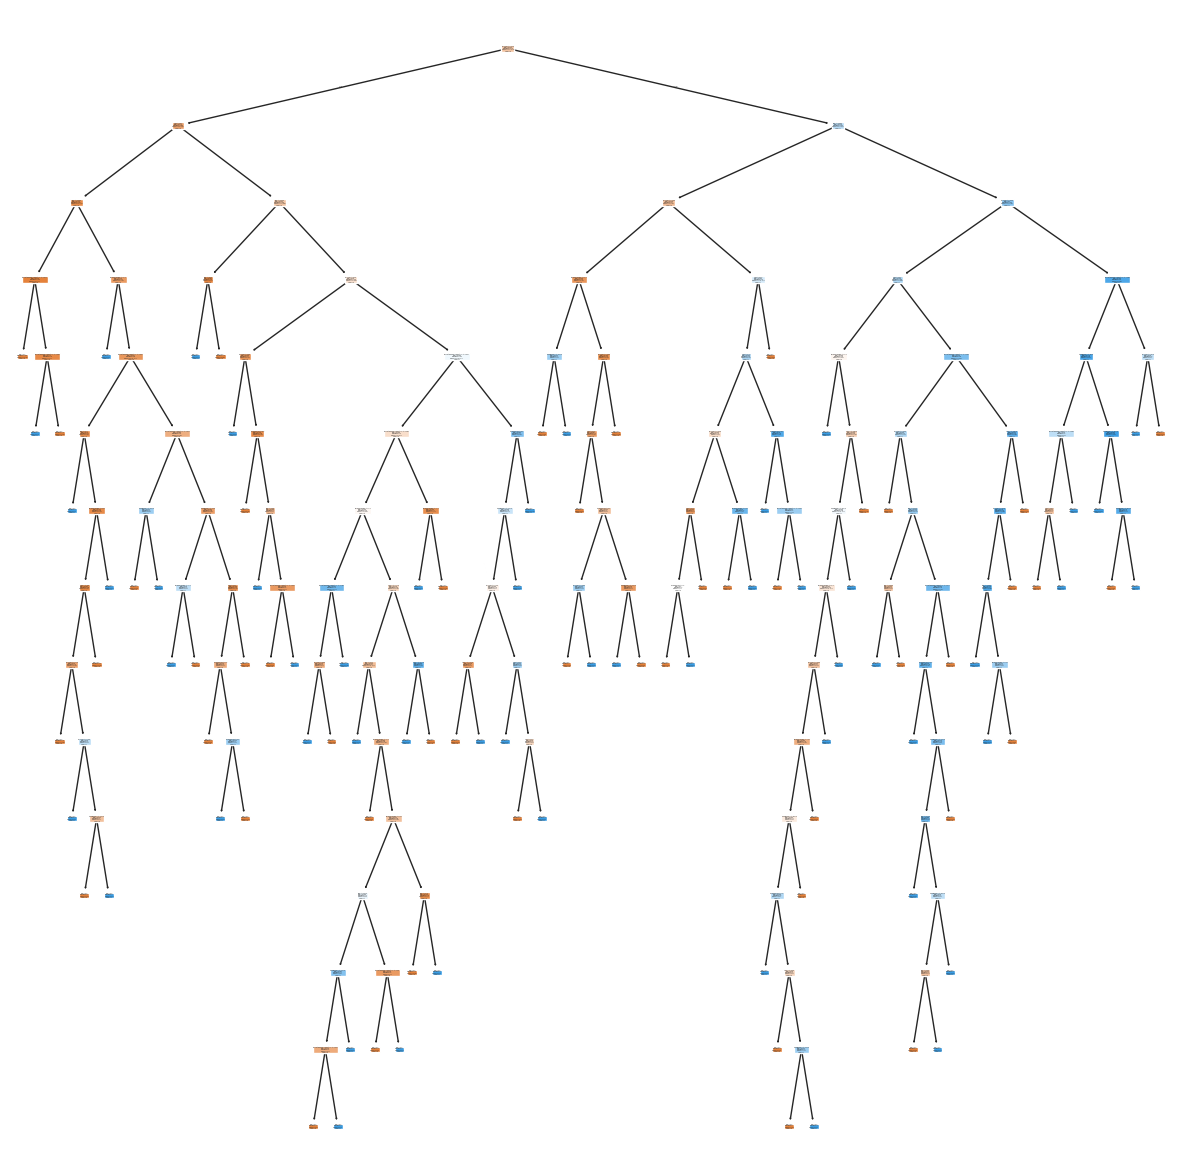

In [70]:
from sklearn import tree

# Creamos la figura
fig = plt.figure(figsize = (15, 15))

# Dibujar el arbol de decision
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ['0','1','2'], filled = True)

# Mostramos la figura
plt.show()

In [71]:
# Realizamos la prediccion en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score

base_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f}%'.format(base_accuracy * 100))

Accuracy Score: 79.22%


## Model Optimization

In [73]:
from sklearn.model_selection import GridSearchCV

# Definimos el modelo de arbol de decision
model = DecisionTreeClassifier()

# Definimos los hiperparametros que queremos probar en la busqueda de cuadricula
hyperparams = {
  # Criterios para medir la calidad de una division
  'criterion' : ['gini', 'entropy'],
  # Profundidad maxima del arbol
  'max_depth' : [None, 5, 10, 20],
  # Numero minimo de muestras necesarias para dividir un nodo
  'min_samples_split' : [2, 5, 10],
  # Numero minimo de muestras necesarias en un nodo hoja
  'min_samples_leaf' : [1, 2, 4]
}

# Configuramos la busqueda de cuadricula con validacion cruzada de 10 pliegues
grid = GridSearchCV(model, hyperparams, scoring = 'accuracy', cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [74]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

# Ajustamos el modelo utilizando los datos de entrenamiento
grid.fit(X_train, y_train)

# Mejores hyperparametros encontrados durante la busqueda
print(f'Best hyperparameters: {grid.best_params_}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [75]:
# Los guardamos
best_params = grid.best_params_

In [76]:
model = DecisionTreeClassifier(
  criterion = best_params['criterion'],
  max_depth = best_params['max_depth'],
  min_samples_leaf = best_params['min_samples_leaf'],
  min_samples_split = best_params['min_samples_split'],
  random_state = 42
)

# Ajustamos el modelo usando los daos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [77]:
# Realizamos la prediccion al conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [78]:
accuracy_hyp = accuracy_score(y_test, y_pred)

# Evaluamos el modelo
print('Accuracy Score with hyperparameters: {:.2f}%'.format(accuracy_hyp * 100))

Accuracy Score with hyperparameters: 77.27%


In [79]:
from pickle import dump

dump(model, open(f'../models/tree_classifier_crit-{best_params['criterion']}_maxdepth-{best_params['max_depth']}_minleaf{best_params['min_samples_leaf']}_minsplit-{best_params['min_samples_split']}_42.sav', 'wb'))